In [158]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import silhouette_score

%matplotlib inline

In [159]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.fit_predict(X)
    centroids = km.cluster_centers_
    sns.scatterplot(X[:,0], X[:,1], hue=y_pred)
    sns.scatterplot(centroids[:,0], centroids[:,1], s=100 , color='y')
    plt.title("K-means")
    plt.show()
    print(km.labels_)
    print(silhouette_score(X, km.labels_))

def WCSS(x):
    wcss=[]
    for i in range(1,7):
        kmeans = KMeans(i)
        kmeans.fit(x)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)
    number_clusters = range(1,7)
    plt.plot(number_clusters,wcss)
    plt.title('The Elbow title')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

In [160]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")
    plt.show()
    print(hier.labels_)
    print(silhouette_score(X, hier.labels_))

In [161]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    plt.show()
    print(db.labels_)
    print(silhouette_score(X, db.labels_))

In [162]:
def gaussianmixture(X, eps, n_components):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    GMM = GaussianMixture(n_components=n_components)
    GMM.fit(X)
    labels = GMM.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
    plt.title("GaussianMixture")
    plt.show()
    print(labels)
    print(silhouette_score(X, labels))

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [163]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


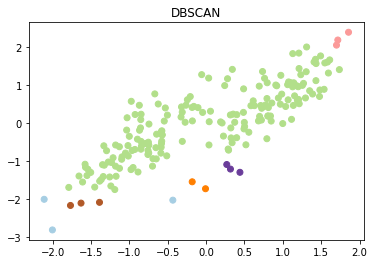

[ 0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  2  0  0  3  0  0
  1  0  0  3  0  0  0  0  0  0  0  3  0  0  2  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0]
-0.10663659728014259


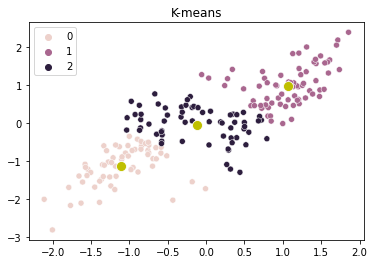

[1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 0 1 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 2
 2 0 1 1 1 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 0 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2
 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 0 2 2 1 0 0 0 0 0 0 0
 1 0 0 2 0 0 2 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 0 0 2 0 2 0 0 2 2 2 0 1 2 0
 2 0 0 0 0 2 2 0 0 0 0 0 2 2 2 0 0 2 2 0 0 0 2 0 2 2 0 2 2 0 2 2 2 0 0 2 0
 2 1 0 0 2 0 2 0 1 0 0 0 2 0 0]
0.43992489383941363


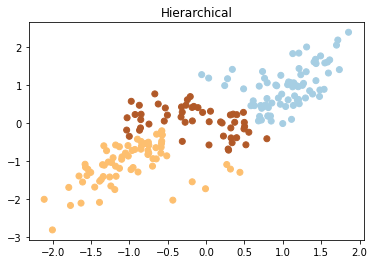

[0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 2 0 0 0 2 0 1 2
 2 1 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2
 2 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 1 2 2 0 1 1 1 1 1 1 1
 0 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 2 2 1 0 2 1
 2 1 1 1 1 1 2 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 2 1 2 2 1 2 1 1 2 2 2 1 1 2 1
 1 0 1 1 2 1 1 1 0 1 1 1 2 1 1]
0.4156770762598497


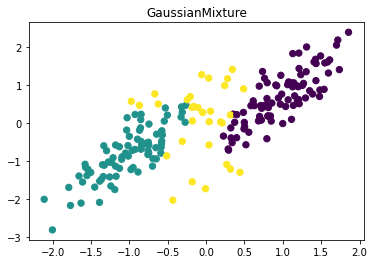

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 1 1 1 2 1 1 1 1 1 1 1
 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 2 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 2 2 1 1 1 1
 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1]
0.3240624210324421


In [164]:
dbscan(d1, .3, 2)
kmeans(d1, 3)
hier(d1, 3)
gaussianmixture(d1, .3, 3)

## Dataset 2

In [165]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
d2.head()


,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


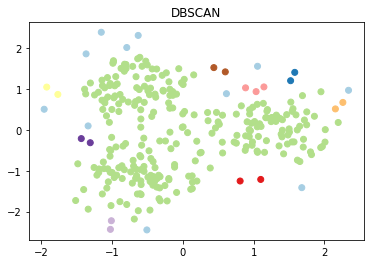

[ 0  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  0
  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  3  1  4  1  1
  1  1  1  1  1  1  1  1  1  2  1 -1  1  1  1  1  3  1  1  1  1  1  2  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  5  1  1  1  1  1  1  1  1  1  1  5  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  7  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  8  1 -1  1  1  1  1  8  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  7  1 -1  1  1  1 -1  1  1  1  6  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1]
-0.38681526127433724


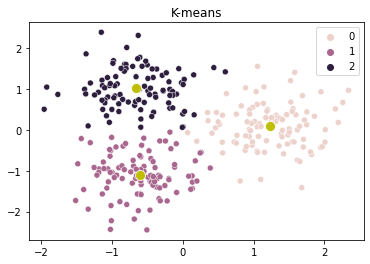

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
0.558315766313531


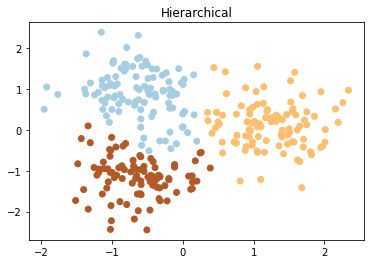

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 1 0
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
0.5331004784160976


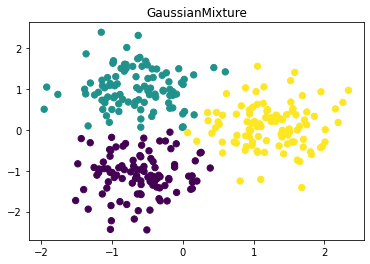

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.558315766313531


In [166]:
dbscan(d2, .3, 2)
kmeans(d2, 3)
hier(d2, 3)
gaussianmixture(d2, .3, 3)

## Dataset 3

In [167]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")
d3.head()


,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


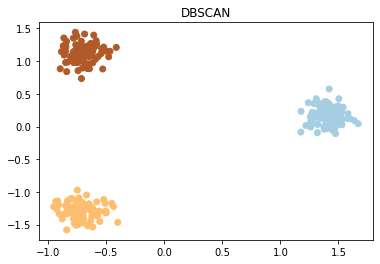

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
0.913619050733588


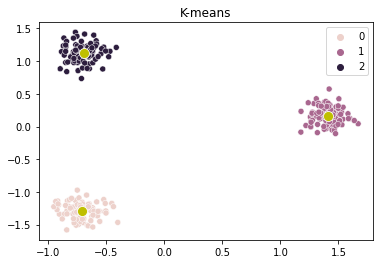

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
0.913619050733588


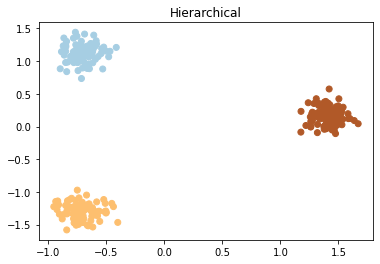

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
0.913619050733588


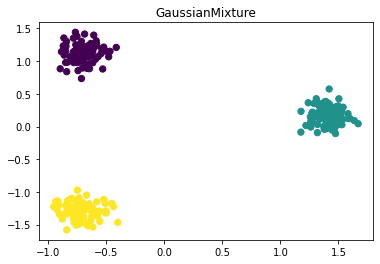

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
0.913619050733588


In [168]:
dbscan(d3, .3, 2)
kmeans(d3, 3)
hier(d3, 3)
gaussianmixture(d3, .3, 3)

## Dataset 4

In [169]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


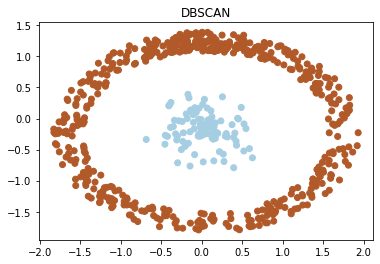

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

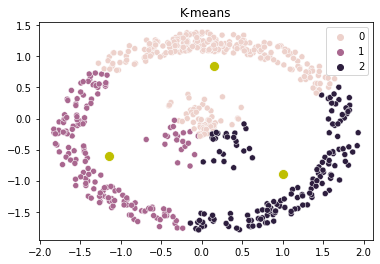

[0 2 0 0 0 0 0 2 0 1 1 1 2 2 0 2 0 0 1 1 2 1 2 0 2 0 1 2 0 0 0 0 0 0 0 0 0
 0 0 1 2 2 0 0 2 0 0 1 1 1 1 1 0 2 0 0 0 1 0 2 0 0 0 0 0 0 2 1 0 0 2 1 0 0
 0 0 0 2 0 0 0 2 2 1 0 0 2 2 1 0 2 0 1 0 2 0 0 0 1 2 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 2 0 0 2 2 0 0 2 0 1 0 0 0 0 1 2 0 1 2 0 0 1 0 0 0 0 0 1 2 2 1 1 0
 0 0 2 0 1 0 1 2 2 2 0 1 1 1 0 0 2 0 0 1 2 0 2 1 1 1 1 2 2 2 0 2 1 0 2 2 0
 1 0 1 2 0 1 0 1 1 0 0 1 1 2 1 0 0 2 1 0 0 2 0 1 1 2 2 1 1 0 0 2 1 0 0 1 1
 0 2 0 0 2 2 0 0 0 1 0 1 0 0 1 1 2 0 0 2 0 1 0 0 0 2 0 2 1 1 0 1 1 0 0 0 2
 1 0 0 2 2 0 1 0 0 2 2 1 2 0 0 2 2 0 2 1 2 0 2 1 0 0 1 2 0 2 1 1 2 2 0 2 2
 1 1 2 2 1 0 1 1 2 1 1 2 0 1 1 1 0 0 1 0 1 1 0 0 2 0 2 0 2 2 1 1 0 2 0 1 1
 0 1 2 1 1 0 0 2 0 0 1 2 0 1 0 1 0 0 0 2 0 1 2 1 1 0 1 0 0 0 1 2 0 1 0 1 0
 2 0 0 2 1 2 0 0 1 0 2 0 0 0 2 0 0 2 1 2 0 1 2 0 1 1 2 1 0 1 1 0 0 0 1 0 0
 0 2 1 2 0 0 2 1 2 0 1 0 0 2 1 0 0 0 0 0 0 1 2 0 0 1 1 1 0 0 0 2 0 1 0 0 0
 1 2 0 1 2 2 2 1 0 0 1 1 0 2 0 0 0 1 1 0 1 2 2 1 2 0 0 0 2 2 0 0 0 0 1 0 0
 2 1 0 2 0 1 0 2 1 2 1 0 

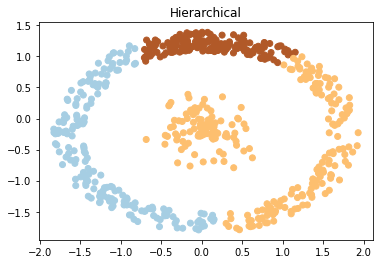

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 2 2 1 0 0 1 2
 2 0 0 0 1 2 2 1 1 2 1 1 2 0 2 2 2 1 0 1 0 0 1 2 2 0 2 2 0 1 2 0 1 1 0 0 1
 2 2 1 2 0 2 0 1 1 1 2 0 0 0 2 2 0 2 2 0 0 2 1 0 0 0 0 1 0 1 1 1 0 2 1 1 2
 0 2 0 1 2 0 0 0 0 2 2 0 0 1 0 2 1 1 0 1 2 1 2 0 0 1 0 0 0 2 2 1 0 2 0 0 0
 2 1 1 2 1 1 2 2 2 0 2 0 2 2 0 0 1 2 2 0 2 0 2 2 0 1 2 1 0 0 2 0 0 2 1 2 1
 0 2 0 1 0 2 0 0 1 1 0 0 1 1 2 1 1 0 1 0 1 1 1 0 2 2 0 1 2 1 0 0 1 0 1 1 1
 0 0 1 1 0 2 0 0 1 0 0 1 2 0 0 0 2 1 0 2 0 0 2 2 1 2 1 0 1 1 0 0 2 1 2 0 0
 2 0 1 0 0 2 2 1 2 2 0 1 2 0 2 0 2 2 1 1 2 0 1 0 0 2 0 2 1 2 0 1 2 0 2 0 2
 0 2 2 1 0 1 2 2 0 2 1 2 2 2 1 2 2 1 0 0 0 0 1 2 0 0 1 0 2 0 0 2 0 2 0 2 1
 2 1 0 1 2 2 1 0 1 2 0 2 2 1 0 1 2 2 2 2 0 0 1 2 2 0 0 0 2 1 2 1 0 0 2 2 0
 0 1 2 0 1 0 1 0 1 2 0 0 2 0 1 1 2 0 0 2 0 1 1 0 1 0 2 1 1 1 2 2 2 2 0 1 2
 1 0 2 1 0 0 2 1 0 1 0 2 

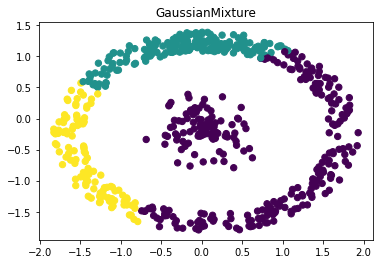

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 1 1 0 1 2 0 1
 1 2 2 2 0 1 1 0 0 1 0 0 1 1 1 1 1 0 2 0 1 2 0 1 1 2 1 1 1 0 1 2 0 0 2 1 0
 1 0 0 1 1 1 2 0 0 0 1 2 1 2 1 1 0 1 1 0 0 0 0 2 2 2 2 0 0 0 0 0 2 1 0 0 1
 2 1 2 0 1 2 1 0 2 1 1 1 1 0 2 1 0 0 2 0 1 0 1 2 2 0 0 0 2 1 0 0 0 1 1 2 0
 1 0 0 1 0 0 1 0 1 2 1 2 1 1 2 2 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 2 1 0 1 0
 2 1 1 0 0 1 2 1 0 0 0 2 0 0 1 0 0 1 0 2 0 0 0 1 1 1 2 0 1 0 2 2 0 0 0 0 0
 2 2 0 0 2 1 2 2 0 0 2 0 1 2 2 2 1 0 2 0 2 2 1 1 0 1 0 1 0 0 2 0 1 0 1 2 2
 1 2 0 2 2 1 1 0 1 1 2 0 1 0 1 2 1 1 0 0 1 2 0 2 2 0 0 1 0 1 0 0 1 0 1 1 1
 0 1 1 0 2 0 1 1 2 1 0 1 1 1 0 1 1 0 2 0 1 2 0 0 2 2 0 2 1 2 1 1 1 1 2 1 0
 1 0 2 0 1 1 0 2 0 1 2 1 1 0 2 0 1 1 1 1 1 2 0 1 1 2 2 2 1 0 1 0 1 2 1 1 1
 0 0 1 2 0 0 0 0 0 1 2 0 1 0 0 0 1 2 1 1 2 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1
 0 2 0 0 1 2 0 0 2 0 1 1 

In [170]:
dbscan(d4, .3, 2)
kmeans(d4, 3)
hier(d4, 3)
gaussianmixture(d4, .3, 3)

### Compare

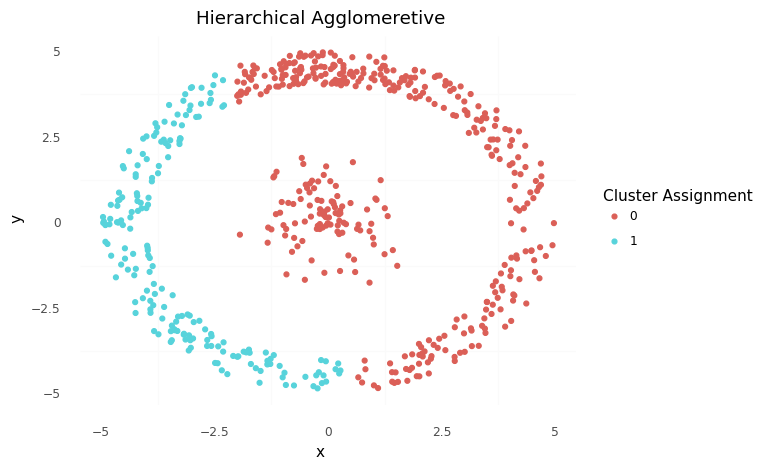

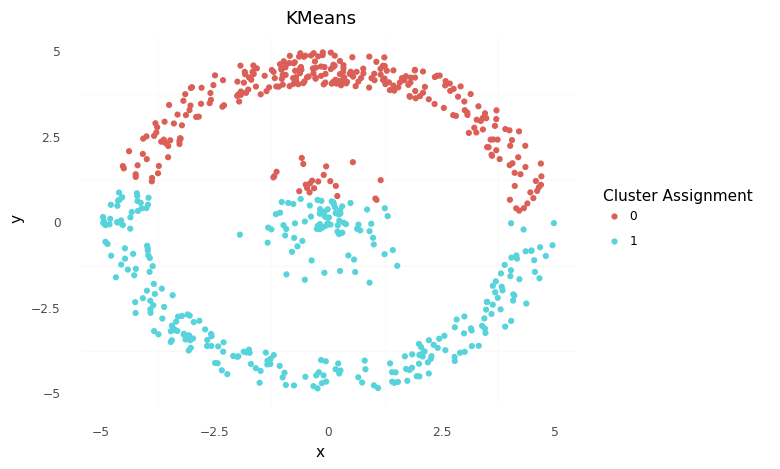

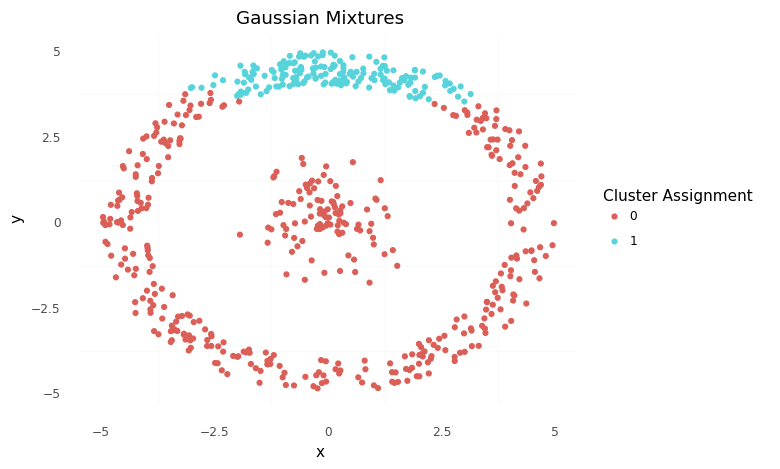

In [171]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [172]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")
d5.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


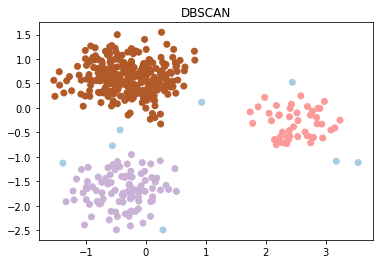

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2

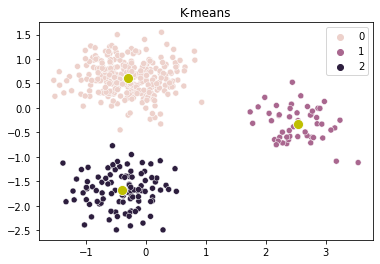

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
0.7043537508086658


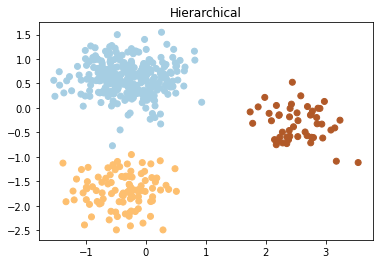

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
0.7031189213721805


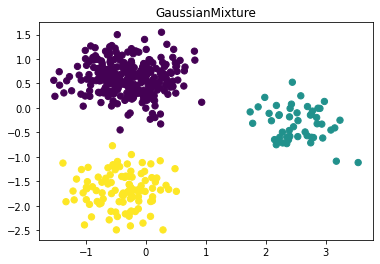

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
0.7043537508086658


In [173]:
dbscan(d5, .3, 2)
kmeans(d5, 3)
hier(d5, 3)
gaussianmixture(d5, .3, 3)

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [174]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

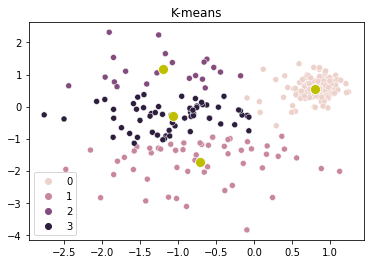

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 1 3 0 3 3 1 2 2 0 3 3 3 3 3 1 1 3 1 1 3 3 1 3 0 0 2 1 2 2 3 0 1 0 3
 3 3 1 2 3 1 1 3 3 1 3 3 1 1 1 3 1 1 3 1 3 0 3 3 1 1 1 3 1 3 1 3 2 3 1 3 1
 1 3 1 2 3 2 3 3 2 3 3 3 0 3 3 3 1 3 1 1 3 3 1 3 3 3 3 1 2 3 1 2 1 2 0 1 3
 0 1 1 3 1 1 1 0 1 1 1 1 3 3 1 2 1 2 3 1 1 1 3 2 1 2 3 1 2 0 1 3 2 3 1 3 2
 1 3 2 1]
0.5684931634597433


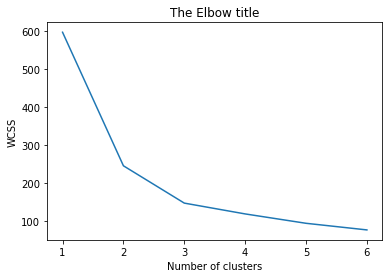

In [183]:
kmeans(d6, 4)
WCSS(d6)

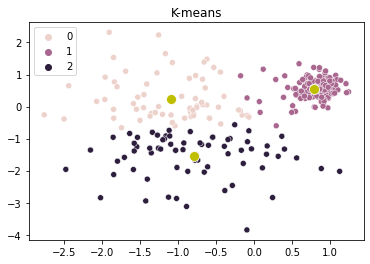

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 2 0 1 2 0 2 0 0 1 0 0 0 0 2 2 2 0 2 2 0 0 2 2 1 1 0 2 0 0 0 1 2 1 0
 2 0 2 0 2 2 2 0 0 2 2 2 2 2 2 0 2 2 0 2 0 1 0 0 2 2 2 0 2 0 2 0 0 0 2 0 2
 2 2 2 0 0 0 0 0 0 0 0 0 1 0 2 2 2 2 2 2 0 0 2 2 0 0 0 2 0 0 2 0 2 0 1 2 0
 1 2 2 0 2 2 2 1 2 2 2 2 0 2 2 0 2 0 0 2 2 2 0 0 2 0 0 2 1 1 2 0 0 2 2 0 0
 2 0 0 2]
0.5861497443577425


In [181]:
kmeans(d6, 3)